In [ ]:
# Upgrade packages
!pip install --upgrade scipy networkx

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Loading Graphs in Networkx

In [ ]:
# Instantiate the graph
G1 = nx.Graph()

#Adding nodes
G1.add_node(1)  # Add a single node
G1.add_nodes_from([2, 3, 4])  # Add multiple nodes from a list

# Adding edges
G1.add_edge(0, 1)  # Add a single edge between nodes 1 and 2
G1.add_edges_from([(0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (6, 9), (4, 7), (7, 10), (8, 10)])  # Add multiple edges from a list of tuples
#Also knwon as Edgelist



In [ ]:
G1.nodes(), G1.edges()

(NodeView((1, 2, 3, 4, 0, 5, 6, 8, 9, 7, 10)),
 EdgeView([(1, 0), (1, 3), (1, 6), (2, 0), (3, 0), (3, 4), (4, 5), (4, 7), (0, 5), (5, 8), (6, 9), (8, 10), (7, 10)]))

In [ ]:
print("Total number of nodes: ", int(G1.number_of_nodes()))
print("Total number of edges: ", int(G1.number_of_edges()))
print("List of all nodes: ", list(G1.nodes()))
print("List of all edges: ", list(G1.edges()))


Total number of nodes:  11
Total number of edges:  13
List of all nodes:  [1, 2, 3, 4, 0, 5, 6, 8, 9, 7, 10]
List of all edges:  [(1, 0), (1, 3), (1, 6), (2, 0), (3, 0), (3, 4), (4, 5), (4, 7), (0, 5), (5, 8), (6, 9), (8, 10), (7, 10)]


#Edgelist

The edge list format represents edge pairings in the first two columns. Looking at `G_edgelist.txt` this is the same as the original graph `G1`

Note: Additional edge attributes can be added in subsequent columns. For example the edge between nodes `0` and `1`, may have a weight of `4`.


Using `read_edgelist` and passing in a list of tuples we will create a graph.


In [ ]:
G4 = nx.read_edgelist('G_edgelist.txt', nodetype=int)

G4.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (6, 9), (4, 7), (7, 10), (8, 10)])



##Adjacency list

G_adjlist.txt is the adjaceny list representation of G1.

It can be read as follows:
* `0 1 2 3 5` $\rightarrow$ node `0` is adjacent to nodes `1, 2, 3, 5`
* `1 3 6` $\rightarrow$ node `1` is (also) adjacent to nodes `3, 6`
* `2` $\rightarrow$ node `2` is (also) adjacent to no new nodes
* `3 4` $\rightarrow$ node `3` is (also) adjacent to node `4`

and so on. Note that adjacencies are only accounted for once (e.g. node `2` is adjacent to node `0`, but node `0` is not listed in node `2`'s row, because that edge has already been accounted for in node `0`'s row).
*italicized text*

In [ ]:
!cat G_adjlist.txt


0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6 9
7 10
8 10
9
10


If we read in the adjacency list using `nx.read_adjlist`, we can see that it matches `G1`.

In [ ]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (6, 9), (4, 7), (7, 10), (8, 10)])

#Adjacency matrix

The elements in an adjacency matrix indicate whether pairs of vertices are adjacent or not in the graph. Each node has a corresponding row and column. For example, row `0`, column `1` corresponds to the edge between node `0` and node `1`.  

Reading across row `0`, there is a '`1`' in columns `1`, `2`, `3`, and `5`, which indicates that node `0` is adjacent to nodes 1, 2, 3, and 5

In [ ]:
G_mat = np.array([
    [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
])

If we convert the adjacency matrix to a networkx graph using `nx.Graph`, we can see that it matches G1.


In [ ]:
G3 = nx.Graph(G_mat)
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (6, 9), (7, 10), (8, 10)])

*How to print the adjaceny matrix of a graph?*

---



#Pandas Dataframe

Graphs can also be created from pandas dataframes if they are in edge list format.



From a `.*csv*` file

In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('G_edgelist.csv')

# Create an undirected graph from the DataFrame
G_csv = nx.from_pandas_edgelist(df, source='source', target='target')

G_csv.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (6, 9), (4, 7), (7, 10), (8, 10)])

From a `.*txt*` file

In [ ]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True,
                   header=None, names=['n1', 'n2'])
G_df

<ipython-input-58-168ac0c164fa>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True,


,n1,n2
0,1,7
0,2,3
0,3,9
0,5,2
1,3,5
1,6,8
3,4,6
4,5,1
4,7,4
5,8,10


In [ ]:
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2') # Use from_pandas_edgelist instead of from_pandas_dataframe
G5.edges()

EdgeView([(1, 7), (1, 5), (7, 4), (7, 10), (2, 3), (2, 5), (3, 9), (3, 5), (5, 10), (6, 8), (6, 4), (8, 10)])

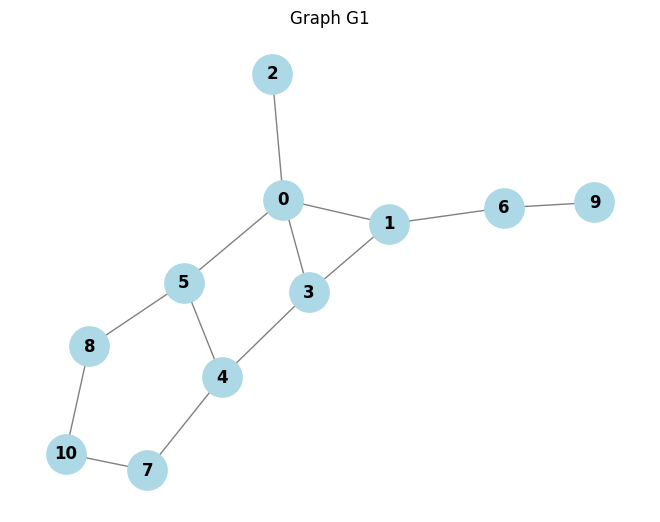

In [ ]:
# Draw the graph G1

# Define the layout for visualization
pos = nx.spring_layout(G1, seed=42)  # Position the nodes
#You can experiment with other layouts like circular_layout, shell_layout, or kamada_kawai_layout to see which best represents your data.


# Step 5: Draw the graph
nx.draw(G1, pos, with_labels=True, node_color='lightblue', edge_color='gray',
        node_size=800, font_weight='bold')

# Step 6: Display the graph
plt.title("Graph G1")
plt.show()


#Directed Graphs

In [ ]:
# Step 1: Create a directed graph
G2 = nx.DiGraph()

# Step 2: Add nodes (optional, as adding edges will add nodes automatically)
G2.add_nodes_from([1, 2, 3, 4, 5])

# Step 3: Add directed edges (arrows go from the first node to the second)
G2.add_edge(1, 2)
G2.add_edge(2, 3)
G2.add_edge(3, 4)
G2.add_edge(4, 5)
G2.add_edge(5, 1)  # This creates a cycle




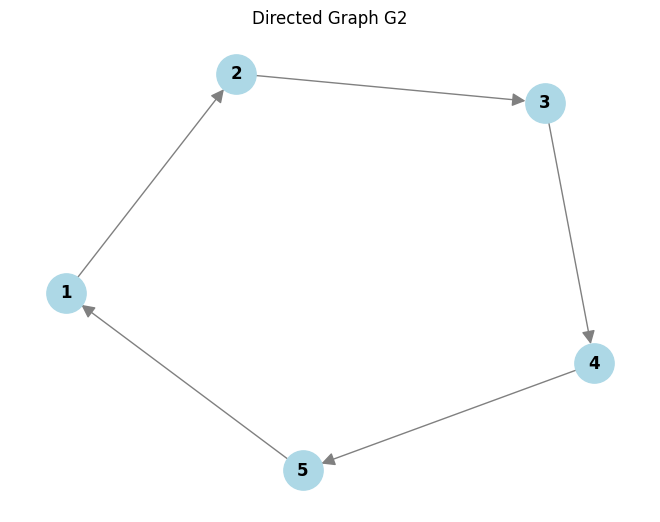

In [ ]:
pos = nx.spring_layout(G2, seed=42)  # Positions for all nodes

# Draw the graph
nx.draw(G2, pos, with_labels=True, node_color='lightblue', edge_color='gray',
        node_size=800, font_weight='bold', arrows=True, arrowsize=20)

# Step 6: Display the graph
plt.title("Directed Graph G2")
plt.show()

#Weighted Graphs

In [ ]:
# Step 1: Create an undirected graph
G = nx.Graph()

# Step 2: Add edges along with their weights
G.add_edge('A', 'B', weight=4)

# Add multiple weighted edges concisely
G.add_weighted_edges_from([
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 5),
    ('B', 'D', 10),
    ('C', 'D', 3),
    ('D', 'E', 8),
    ('E', 'A', 7)
])

G.edges(data=True)


EdgeDataView([('A', 'B', {'weight': 4}), ('A', 'C', {'weight': 2}), ('A', 'E', {'weight': 7}), ('B', 'C', {'weight': 5}), ('B', 'D', {'weight': 10}), ('C', 'D', {'weight': 3}), ('D', 'E', {'weight': 8})])

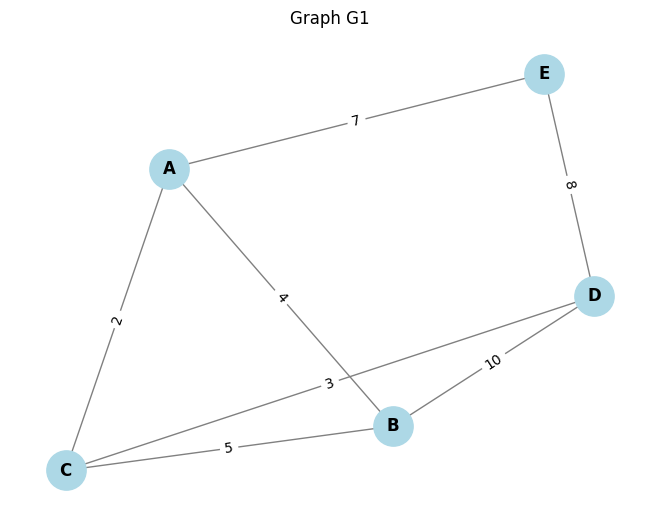

In [ ]:
# Draw the graph

# Define the layout for visualization
pos = nx.spring_layout(G, seed=42)  # Position the nodes
#You can experiment with other layouts like circular_layout, shell_layout, or kamada_kawai_layout to see which best represents your data.

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_weight='bold')

# Draw edge labels (for weights or any attributes)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph G1")
plt.show()

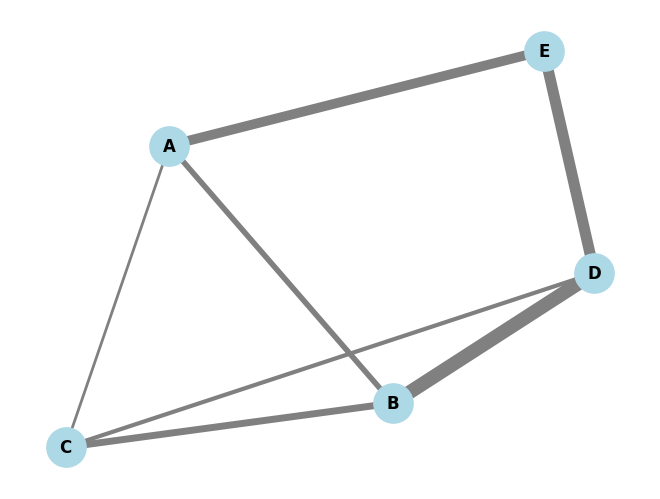

In [ ]:
#Edge Thickness Proportional to Weight:

weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray',
        node_size=800, font_weight='bold', width=weights)

In [ ]:
#save figure
plt.savefig("weighted_graph.png", dpi=300)


<Figure size 640x480 with 0 Axes>

#Multigraph

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create a MultiGraph
G = nx.MultiGraph()

# Step 2: Add multiple edges between the same pair of nodes
G.add_edge('A', 'B', relation='friend')
G.add_edge('A', 'B', relation='colleague')
G.add_edge('A', 'B', relation='neighbor')

G.edges(), G.nodes()


(MultiEdgeDataView([('A', 'B'), ('A', 'B'), ('A', 'B')]), NodeView(('A', 'B')))

In [ ]:
#Write here code to draw a multigraph

#Graphs with attributes

In [ ]:
# Step 1: Create a graph
G = nx.Graph()

# Step 2: Add nodes with attributes
G.add_node(1, label="Alice", age=25)
G.add_node(2, label="Bob", age=30)
G.add_node(3, label="Carol", age=22)

# Step 3: Add edges with attributes
G.add_edge(1, 2, relation="friends", weight=5)
G.add_edge(2, 3, relation="colleagues", weight=3)
G.add_edge(3, 1, relation="neighbors", weight=2)


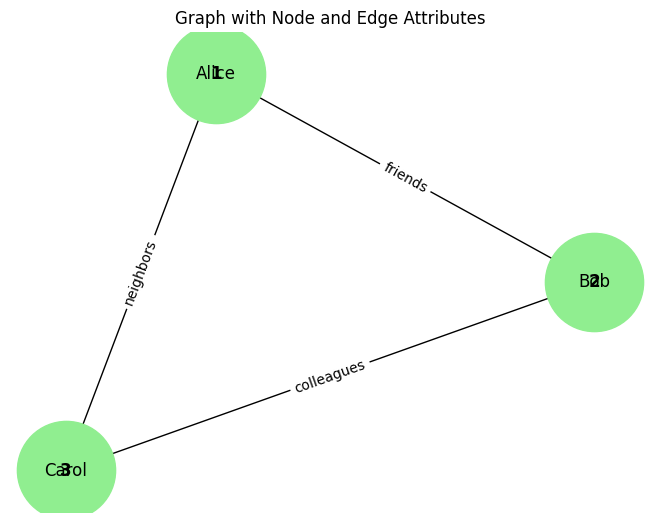

In [ ]:
# Step 4: Define layout
pos = nx.spring_layout(G, seed=42)

# Step 5: Draw nodes with labels
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=5000, font_weight='bold')

# Step 6: Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Step 7: Optional - display node attributes
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Step 8: Show plot
plt.title("Graph with Node and Edge Attributes")
plt.axis('off')
plt.show()